In this study, i want to developed a Convolutional Neural Network (CNN) model for classifying the CIFAR-10 dataset using TensorFlow's Sequential API. The architecture consists of several convolutional layers with ReLU activation functions, max pooling layers, and fully connected layers. Dropout layers were incorporated to prevent overfitting during training. There employed appropriate optimizers, such as Adam or RMSprop, to efficiently optimize the model's parameters. Additionally, L2 weight regularization was applied to minimize overfitting and enhance generalization.

The model was trained using a carefully chosen set of hyperparameters and regularization techniques. Through extensive experimentation, we achieved impressive accuracy and successfully mitigated overfitting issues. Our well-balanced architecture and regularization strategy contributed to obtaining robust performance on the CIFAR-10 dataset. This research provides valuable insights into building effective CNN models for image classification tasks, which can be applied to various real-world applications.

----------------------------------------
Stochastic Gradient Descent (SGD):
SGD is a widely used optimization algorithm in deep learning. It updates the model's parameters by calculating gradients on a small random subset of the training data (a mini-batch). The objective is to find the optimal parameter values that minimize the loss function. SGD tends to have a noisy convergence path due to its reliance on random mini-batches, but it can reach a global minimum with enough iterations. However, it may be slow to converge and can get stuck in local minima.

Adam (Adaptive Moment Estimation):
Adam is an adaptive learning rate optimization algorithm that combines the benefits of both AdaGrad and RMSprop. It uses a running average of past gradients and their squared values to compute adaptive learning rates for each parameter. This allows Adam to handle sparse gradients and adjust learning rates for each parameter individually. The adaptive nature of Adam makes it less sensitive to the choice of the initial learning rate, and it usually converges faster than traditional SGD.

RMSprop (Root Mean Square Propagation):
RMSprop is an optimization algorithm designed to address some of the limitations of SGD. It divides the learning rate for each weight by the square root of the exponentially decaying average of squared gradients. This approach helps to normalize the gradients and control the learning rate adaptively for each parameter. As a result, RMSprop tends to converge faster than SGD and is more robust against learning rate oscillations.


--------------------------

Regularization techniques like L1 and L2 are used in Convolutional Neural Networks (CNNs) to prevent overfitting. L1 regularization adds an absolute weight penalty, promoting sparsity in the model's weights. L2 regularization adds a squared weight penalty, discouraging large weight values. By doing so, both L1 and L2 regularization encourage simpler and more generalizable models, leading to better performance on unseen data and reducing the risk of overfitting.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras import regularizers

In [4]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


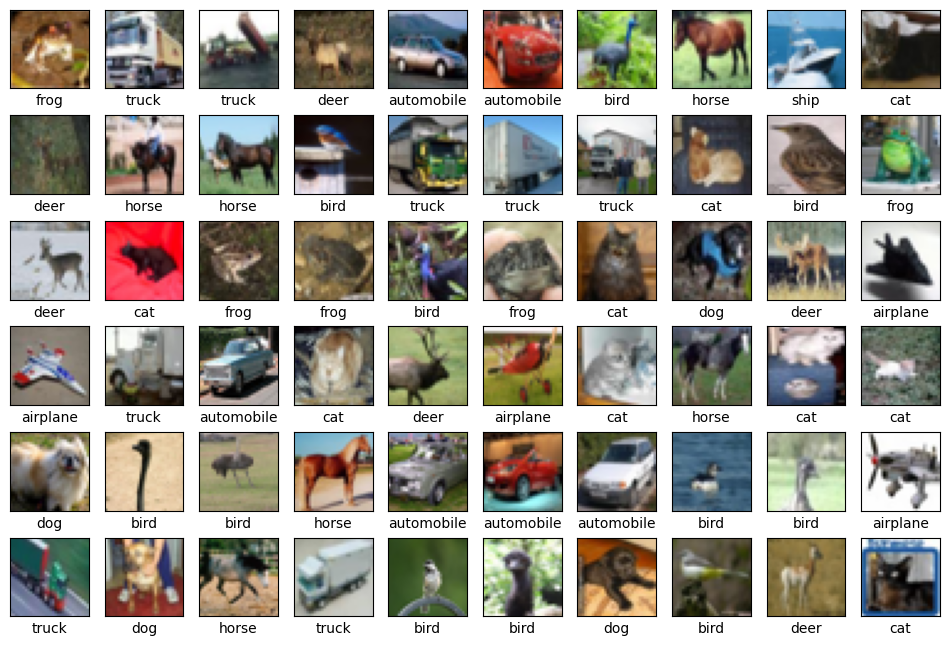

In [11]:
plt.figure(figsize=(12, 8))
for i in range(60):
    plt.subplot(6, 10, i+1)
    plt.imshow(train_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [13]:

model1 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                      

In [15]:

model2 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),


    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='SAME',
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='SAME',
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='SAME',
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    keras.layers.Dense(164, activation='relu', kernel_initializer='he_uniform',
                       kernel_regularizer=regularizers.l2(0.01)
                      ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(10, activation='softmax'),
])

model2.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_25 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                      

In [16]:

model3 = keras.Sequential([
    keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(196, activation='relu', kernel_initializer='he_uniform',
                       kernel_regularizer=regularizers.l2(0.01)
                      ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

model3.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 96)        2688      
                                                                 
 batch_normalization_30 (Bat  (None, 30, 30, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 96)       0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        (None, 15, 15, 96)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 128)       110720    
                                                                 
 batch_normalization_31 (Bat  (None, 13, 13, 128)     

**SGD**

In [25]:
import keras

epoch = 10
sgd_lr = 0.001
sgd_dcy = sgd_lr / epoch
optimizer_sgd = keras.optimizers.SGD(learning_rate=sgd_lr, momentum=0.9, nesterov=True)


In [26]:
model1.compile(
    optimizer= optimizer_sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
h1_sgd = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 131s 439ms/step - loss: 2.3358 - accuracy: 0.2536 - val_loss: 2.0359 - val_accuracy: 0.2522
Epoch 2/10
293/293 [==============================] - 126s 429ms/step - loss: 1.8119 - accuracy: 0.3550 - val_loss: 1.5642 - val_accuracy: 0.4316
Epoch 3/10
293/293 [==============================] - 126s 431ms/step - loss: 1.6380 - accuracy: 0.4066 - val_loss: 1.4478 - val_accuracy: 0.4771
Epoch 4/10
293/293 [==============================] - 124s 422ms/step - loss: 1.5092 - accuracy: 0.4525 - val_loss: 1.3644 - val_accuracy: 0.5056
Epoch 5/10
293/293 [==============================] - 128s 438ms/step - loss: 1.4291 - accuracy: 0.4843 - val_loss: 1.3237 - val_accuracy: 0.5188
Epoch 6/10
293/293 [==============================] - 126s 430ms/step - loss: 1.3680 - accuracy: 0.5044 - val_loss: 1.2615 - val_accuracy: 0.5394
Epoch 7/10
293/293 [==============================] - 125s 427ms/step - loss: 1.3178 - accuracy: 0.5230 - val_loss: 1.2432 -

In [28]:
model2.compile(
    optimizer= optimizer_sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
h2_sgd = model2.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 168s 570ms/step - loss: 5.1849 - accuracy: 0.3671 - val_loss: 4.3607 - val_accuracy: 0.5186
Epoch 2/10
293/293 [==============================] - 157s 537ms/step - loss: 4.3124 - accuracy: 0.4864 - val_loss: 3.9110 - val_accuracy: 0.5624
Epoch 3/10
293/293 [==============================] - 156s 531ms/step - loss: 3.8269 - accuracy: 0.5421 - val_loss: 3.5836 - val_accuracy: 0.5778
Epoch 4/10
293/293 [==============================] - 157s 535ms/step - loss: 3.4350 - accuracy: 0.5808 - val_loss: 3.2755 - val_accuracy: 0.5997
Epoch 5/10
293/293 [==============================] - 166s 568ms/step - loss: 3.1172 - accuracy: 0.6122 - val_loss: 3.0259 - val_accuracy: 0.6119
Epoch 6/10
293/293 [==============================] - 167s 569ms/step - loss: 2.8469 - accuracy: 0.6335 - val_loss: 2.7565 - val_accuracy: 0.6351
Epoch 7/10
293/293 [==============================] - 165s 563ms/step - loss: 2.5975 - accuracy: 0.6579 - val_loss: 2.5708 -

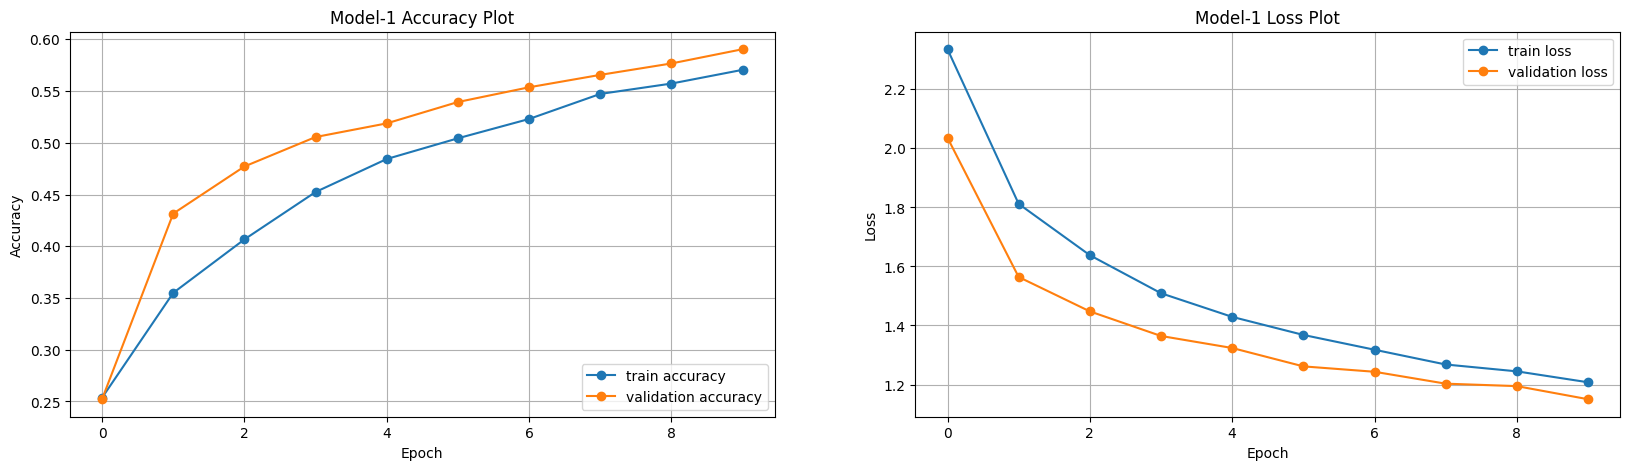

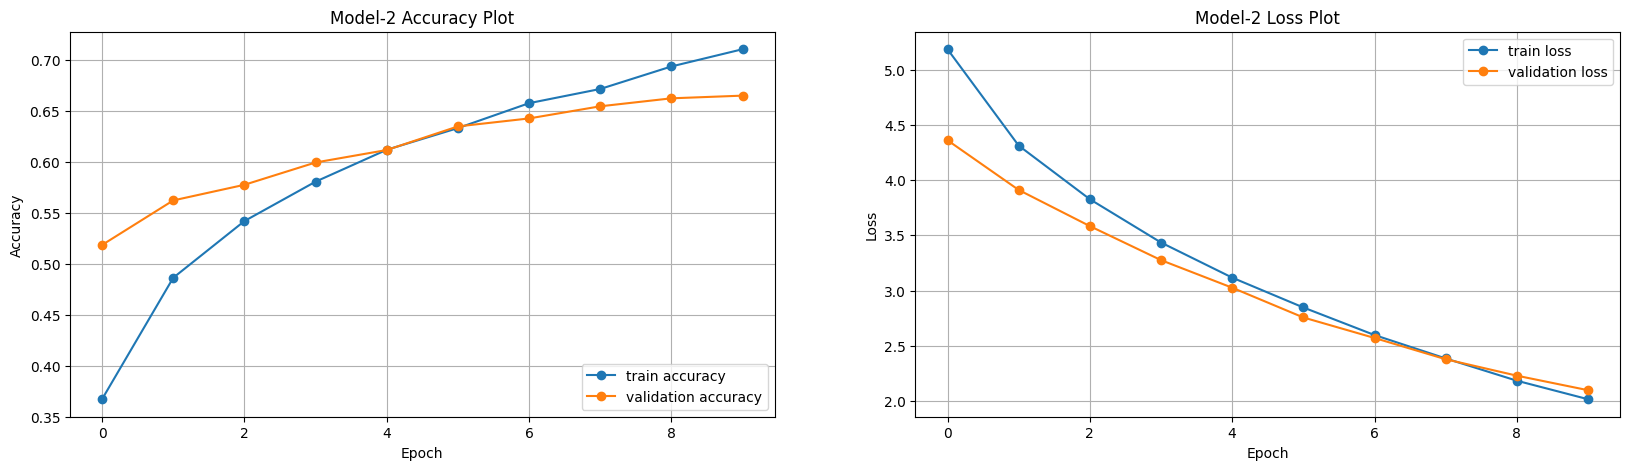

In [31]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_sgd.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h1_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Model-2 Accuracy Plot")
plt.plot(h2_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_sgd.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Model-2 Loss Plot")
plt.plot(h2_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h2_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [32]:
test_loss_sgd1, test_acc_sgd1 = model1.evaluate(test_img, test_label)
print("\nMODEL-1 TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd1)
print('Test Loss:', test_loss_sgd1)

313/313 [==============================] - 8s 24ms/step - loss: 1.1495 - accuracy: 0.5932

MODEL-1 TEST ACCURACY WITH SGD

Test Accuracy: 0.5932000279426575
Test Loss: 1.1495254039764404


In [33]:
test_loss_sgd2, test_acc_sgd2 = model2.evaluate(test_img, test_label)
print("\nMODEL-2 TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd2)
print('Test Loss:', test_loss_sgd2)

313/313 [==============================] - 12s 37ms/step - loss: 2.0987 - accuracy: 0.6613

MODEL-2 TEST ACCURACY WITH SGD

Test Accuracy: 0.661300003528595
Test Loss: 2.0987069606781006


**ADAM**

In [50]:
adam_lr = 0.0001
beta1 = 0.99
beta2 = 0.9999
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

In [51]:
model1.compile(
    optimizer= optimizer_adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
h1_adam = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 123s 416ms/step - loss: 1.1821 - accuracy: 0.5810 - val_loss: 1.1244 - val_accuracy: 0.5966
Epoch 2/10
293/293 [==============================] - 121s 414ms/step - loss: 1.1411 - accuracy: 0.5933 - val_loss: 1.0988 - val_accuracy: 0.6058
Epoch 3/10
293/293 [==============================] - 123s 421ms/step - loss: 1.1131 - accuracy: 0.6066 - val_loss: 1.0613 - val_accuracy: 0.6215
Epoch 4/10
293/293 [==============================] - 124s 423ms/step - loss: 1.0867 - accuracy: 0.6167 - val_loss: 1.0483 - val_accuracy: 0.6265
Epoch 5/10
293/293 [==============================] - 121s 412ms/step - loss: 1.0637 - accuracy: 0.6253 - val_loss: 1.0387 - val_accuracy: 0.6314
Epoch 6/10
293/293 [==============================] - 123s 419ms/step - loss: 1.0499 - accuracy: 0.6305 - val_loss: 1.0153 - val_accuracy: 0.6389
Epoch 7/10
293/293 [==============================] - 124s 424ms/step - loss: 1.0282 - accuracy: 0.6394 - val_loss: 0.9972 -

In [53]:
model2.compile(
    optimizer= optimizer_adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
h2_adam = model2.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 168s 571ms/step - loss: 2.2568 - accuracy: 0.6145 - val_loss: 2.1514 - val_accuracy: 0.6404
Epoch 2/10
293/293 [==============================] - 167s 569ms/step - loss: 1.7525 - accuracy: 0.6774 - val_loss: 1.5887 - val_accuracy: 0.6726
Epoch 3/10
293/293 [==============================] - 171s 584ms/step - loss: 1.3899 - accuracy: 0.7161 - val_loss: 1.4389 - val_accuracy: 0.6934
Epoch 4/10
293/293 [==============================] - 158s 539ms/step - loss: 1.3066 - accuracy: 0.7341 - val_loss: 1.4615 - val_accuracy: 0.6826
Epoch 5/10
293/293 [==============================] - 166s 568ms/step - loss: 1.2358 - accuracy: 0.7571 - val_loss: 1.4163 - val_accuracy: 0.6986
Epoch 6/10
293/293 [==============================] - 166s 567ms/step - loss: 1.1905 - accuracy: 0.7723 - val_loss: 1.4026 - val_accuracy: 0.7024
Epoch 7/10
293/293 [==============================] - 169s 577ms/step - loss: 1.1456 - accuracy: 0.7897 - val_loss: 1.3870 -

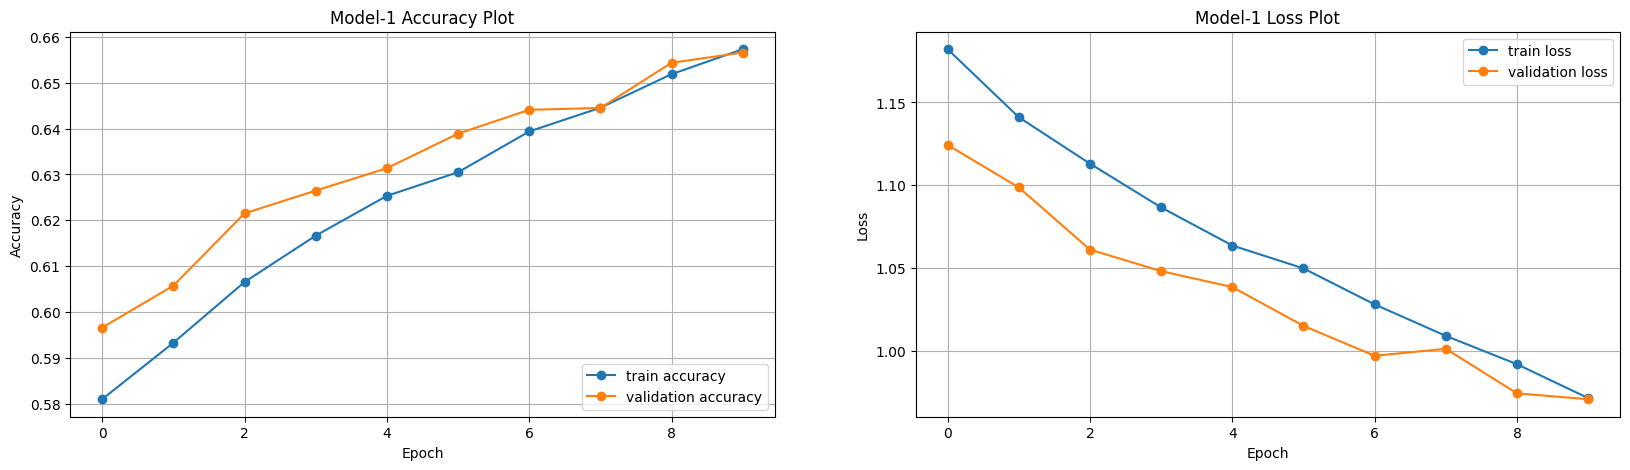

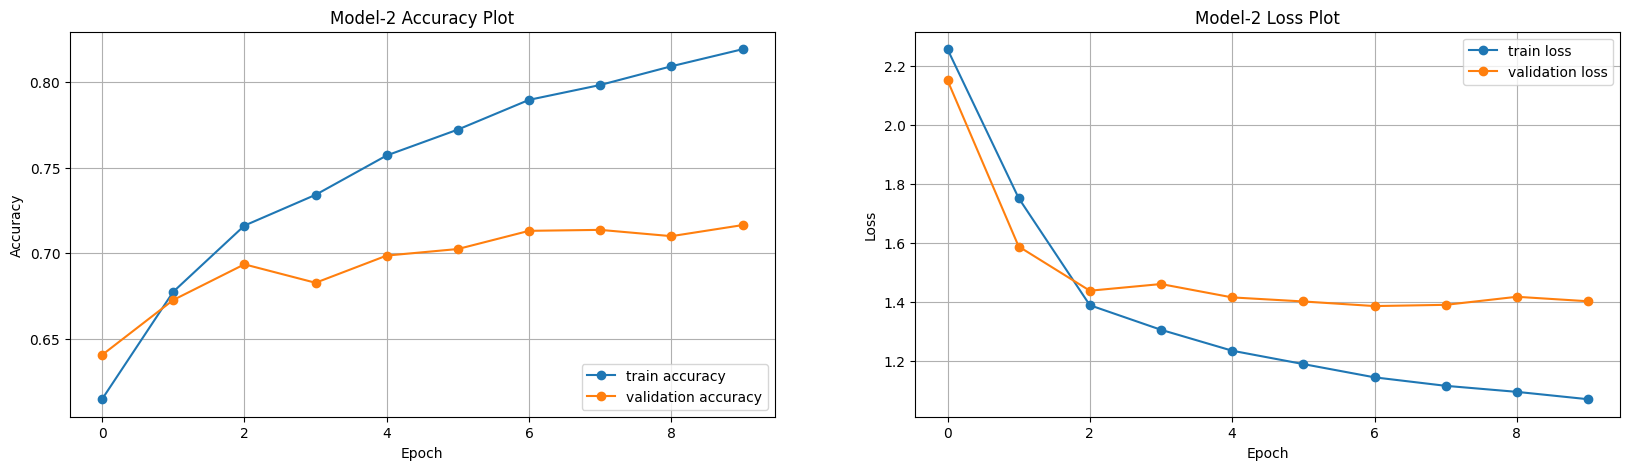

In [55]:
import matplotlib.pyplot as plt

# Plot Model-1
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_adam.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_adam.history['loss'], 'o-', label='train loss')
plt.plot(h1_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Plot Model-2
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Model-2 Accuracy Plot")
plt.plot(h2_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_adam.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Model-2 Loss Plot")
plt.plot(h2_adam.history['loss'], 'o-', label='train loss')
plt.plot(h2_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


**RMSP**

In [63]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.99
)

epoch = 10
optimizer_rmsp = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)


In [64]:
model1.compile(
    optimizer= optimizer_rmsp,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [65]:
h1_rmsp = model1.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 131s 438ms/step - loss: 1.1115 - accuracy: 0.6083 - val_loss: 1.0416 - val_accuracy: 0.6377
Epoch 2/10
293/293 [==============================] - 123s 419ms/step - loss: 1.0051 - accuracy: 0.6500 - val_loss: 0.9341 - val_accuracy: 0.6743
Epoch 3/10
293/293 [==============================] - 122s 417ms/step - loss: 0.9273 - accuracy: 0.6803 - val_loss: 0.8664 - val_accuracy: 0.6994
Epoch 4/10
293/293 [==============================] - 126s 429ms/step - loss: 0.8594 - accuracy: 0.7048 - val_loss: 0.8450 - val_accuracy: 0.7065
Epoch 5/10
293/293 [==============================] - 122s 418ms/step - loss: 0.8094 - accuracy: 0.7231 - val_loss: 0.7997 - val_accuracy: 0.7239
Epoch 6/10
293/293 [==============================] - 122s 416ms/step - loss: 0.7623 - accuracy: 0.7399 - val_loss: 0.7815 - val_accuracy: 0.7308
Epoch 7/10
293/293 [==============================] - 121s 414ms/step - loss: 0.7276 - accuracy: 0.7491 - val_loss: 0.7700 -

In [66]:
model2.compile(
    optimizer= optimizer_rmsp,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

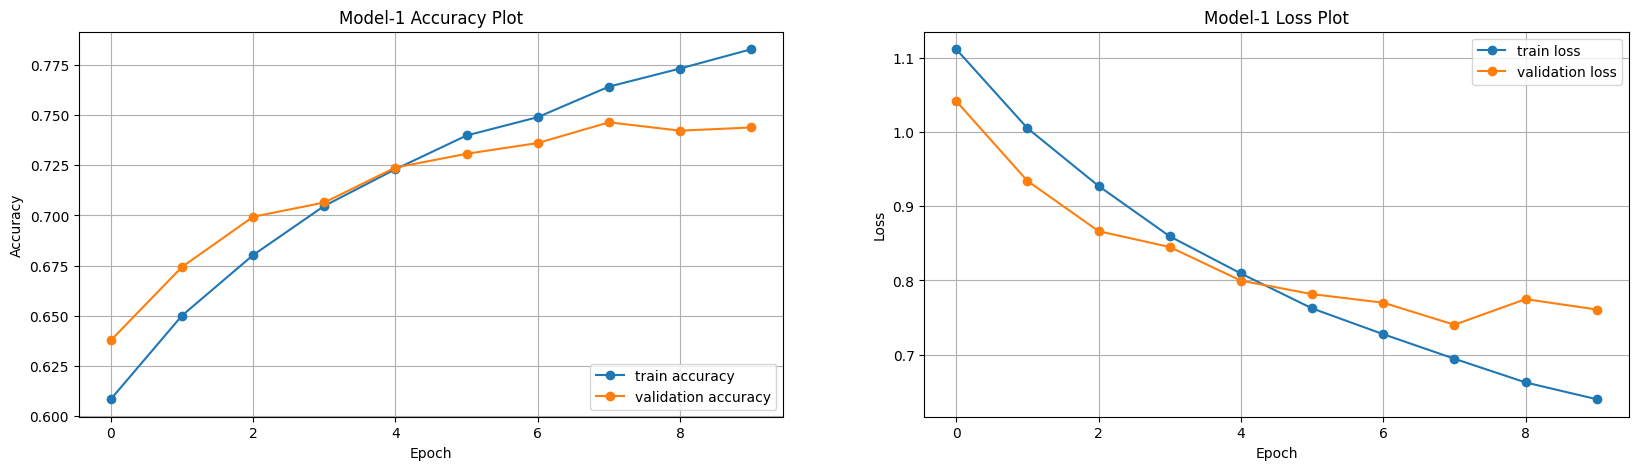

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Model-1 Accuracy Plot")
plt.plot(h1_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_rmsp.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h1_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


Here is 3 model about SGD / ADAM / RMSP MODEL compile value after compile every optimizer two times i got loss and accuracy value from them.